In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")

%matplotlib inline 

In [2]:
# carregando o arquivo
dados = pd.read_csv('candidatosjovens.csv', sep='|', error_bad_lines=False, low_memory=False)

C:\Users\Saman\anaconda3\envs\Data_Labe\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 40149: expected 63 fields, saw 64\n'


In [4]:
dados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,15/06/2021,07:18:44,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6002102120206130176,2,DEFERIDO,2,DEFERIDO,SIM
1,15/06/2021,07:18:44,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6002834620206100480,2,DEFERIDO,2,DEFERIDO,SIM
2,15/06/2021,07:18:44,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6002552420206050304,2,DEFERIDO,2,DEFERIDO,SIM
3,15/06/2021,07:18:44,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6000644720206130176,2,DEFERIDO,2,DEFERIDO,SIM
4,15/06/2021,07:18:44,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,N,-1,6003637620206260224,2,DEFERIDO,2,DEFERIDO,SIM


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47048 entries, 0 to 47047
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     47048 non-null  object 
 1   HH_GERACAO                     47048 non-null  object 
 2   ANO_ELEICAO                    47048 non-null  int64  
 3   CD_TIPO_ELEICAO                47048 non-null  int64  
 4   NM_TIPO_ELEICAO                47048 non-null  object 
 5   NR_TURNO                       47048 non-null  int64  
 6   CD_ELEICAO                     47048 non-null  int64  
 7   DS_ELEICAO                     47048 non-null  object 
 8   DT_ELEICAO                     47048 non-null  object 
 9   TP_ABRANGENCIA                 47048 non-null  object 
 10  SG_UF                          47048 non-null  object 
 11  SG_UE                          47048 non-null  int64  
 12  NM_UE                          47048 non-null 

Renomeando a coluna raça para os declarados pretos e pardos


***OBS:*** *A análise considera negros como a soma de pretos e pardos, isto devido o recorte racial que está sendo feito na análise e entendimento da população negra no Brasil por parte da organização*

In [6]:
for (row, col) in dados.iterrows():
    if col.DS_COR_RACA == 'PRETA':
        dados['DS_COR_RACA'].replace(to_replace=col.DS_COR_RACA, value='NEGRA', inplace=True)
    if col.DS_COR_RACA == 'PARDA':
        dados['DS_COR_RACA'].replace(to_replace=col.DS_COR_RACA, value='NEGRA', inplace=True)

#### INAPTOS

São os que estão na situação de canditatura como inapto

Qual a descrição de idade dos candidatos com ds_situacao_candidatura == inapto e o qual o ds_detalhe_situacao?

In [8]:
inaptos = dados.loc[dados['DS_SITUACAO_CANDIDATURA'] == 'INAPTO']

In [101]:
# salvando arquivo csv para os inaptos
inaptos.to_csv=('inaptos.csv')

In [103]:
inaptos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 145 to 47021
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     2367 non-null   object 
 1   HH_GERACAO                     2367 non-null   object 
 2   ANO_ELEICAO                    2367 non-null   int64  
 3   CD_TIPO_ELEICAO                2367 non-null   int64  
 4   NM_TIPO_ELEICAO                2367 non-null   object 
 5   NR_TURNO                       2367 non-null   int64  
 6   CD_ELEICAO                     2367 non-null   int64  
 7   DS_ELEICAO                     2367 non-null   object 
 8   DT_ELEICAO                     2367 non-null   object 
 9   TP_ABRANGENCIA                 2367 non-null   object 
 10  SG_UF                          2367 non-null   object 
 11  SG_UE                          2367 non-null   int64  
 12  NM_UE                          2367 non-null 

In [99]:
inaptos['NR_IDADE_DATA_POSSE'].value_counts()

29    326
27    302
28    291
26    254
25    242
24    220
23    196
21    150
22    147
20    119
19     73
18     47
Name: NR_IDADE_DATA_POSSE, dtype: int64

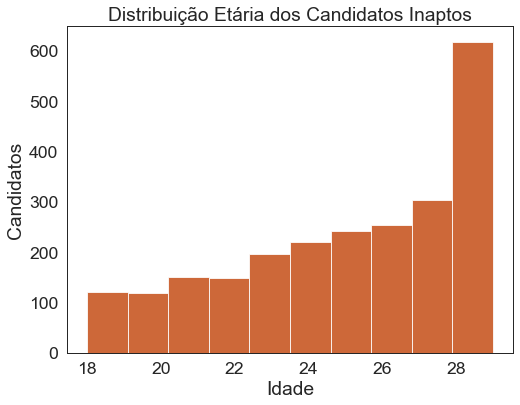

In [100]:
# Criando histograma

idade = inaptos['NR_IDADE_DATA_POSSE']

plt.figure(figsize=(8, 6))
plt.hist(idade, color= '#CD6839', density=False)
plt.title('Distribuição Etária dos Candidatos Inaptos')
plt.xlabel('Idade')
plt.ylabel('Candidatos')
#plt.savefig('imagens/peso-histograma.png')
plt.show()


In [25]:
inaptos['DS_DETALHE_SITUACAO_CAND'].value_counts()

INDEFERIDO              1214
RENÚNCIA                1094
PEDIDO NÃO CONHECIDO      37
CANCELADO                 13
CASSADO                    6
FALECIDO                   3
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

 - Inaptos distribuição de gênero


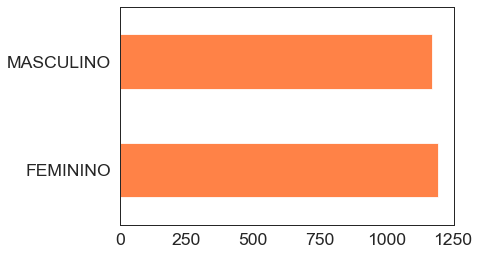

In [110]:
inaptos['DS_GENERO'].value_counts().plot(kind='barh', color='#FF8247')

 - Inaptos distribuição racial

In [9]:
inaptos['DS_COR_RACA'].value_counts()

NEGRA             1324
BRANCA             985
SEM INFORMAÇÃO      29
INDÍGENA            18
AMARELA             11
Name: DS_COR_RACA, dtype: int64

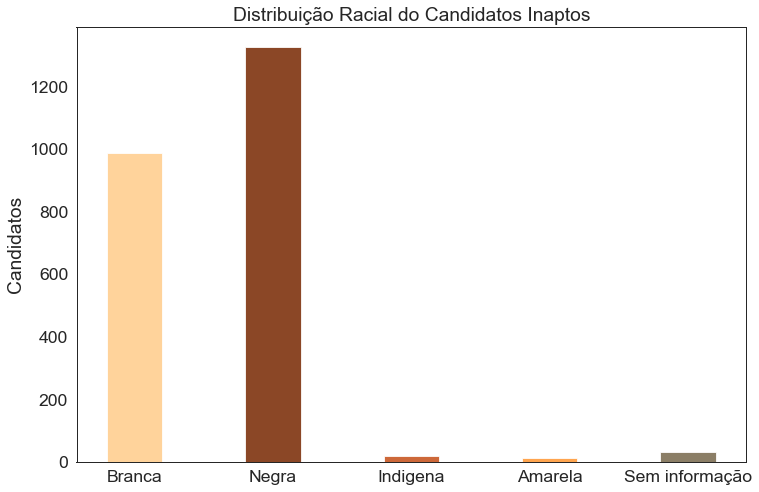

In [115]:
branca = 985
negra = 1324
indigena = 18
amarela = 11
sem_info = 29


#definindo a largura da barra
barWidth = 0.4

#aumentando o gráfico 
plt.figure(figsize=(12,8))



# Criando as barras 
plt.bar('Branca', branca, color='#FFD39B', width=barWidth, align='center')
plt.bar('Negra',negra, color='#8B4726', width=barWidth, align='center')
plt.bar('Indigena',indigena, color='#CD6839', width=barWidth, align='center')
plt.bar('Amarela',amarela, color='#FFA54F', width=barWidth, align='center')
plt.bar('Sem informação',sem_info, color='#8B7E66', width=barWidth, align='center')

# Adicionando legendas

plt.ylabel('Candidatos')
plt.title('Distribuição Racial do Candidatos Inaptos')

# Criando legenda e mostrando o gráfico
plt.show()

Dos 47.048 candidatos 2367 são inaptos na situação de candidatura. 50,5% dos inaptos são mulheres e 56% são negros

Qual a descrição dos candidatos que tem vr_despesa == NA?

In [53]:
sem_despesa = dados.loc[dados['VR_DESPESA_MAX_CAMPANHA'].isnull()]

In [58]:
sem_despesa['DS_SITUACAO_CANDIDATURA'].value_counts()

APTO          822
INAPTO         66
CADASTRADO      2
Name: DS_SITUACAO_CANDIDATURA, dtype: int64

In [57]:
sem_despesa['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                  814
INDEFERIDO                 32
RENÚNCIA                   29
DEFERIDO COM RECURSO        5
PEDIDO NÃO CONHECIDO        3
CANCELADO                   2
INDEFERIDO COM RECURSO      2
AGUARDANDO JULGAMENTO       2
PENDENTE DE JULGAMENTO      1
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [59]:
sem_despesa['NR_IDADE_DATA_POSSE'].value_counts()

28    165
29    154
26    134
27    121
25     89
23     69
24     65
22     46
21     42
20      3
19      2
Name: NR_IDADE_DATA_POSSE, dtype: int64

Quantos tiveram a st_situacao_urna como não?

In [60]:
dados['DS_SITUACAO_CANDIDATO_URNA'].value_counts()

DEFERIDO                            43801
#NULO#                               1577
INDEFERIDO COM RECURSO                849
PENDENTE DE JULGAMENTO                558
DEFERIDO COM RECURSO                  259
PEDIDO NÃO CONHECIDO COM RECURSO        4
Name: DS_SITUACAO_CANDIDATO_URNA, dtype: int64

Qual a descrição dos candidatos divididos pela ds_situacao_candidato_pleito?

In [68]:
dados['DS_SITUACAO_CANDIDATO_PLEITO'].value_counts()

DEFERIDO                            44322
#NULO#                               1577
INDEFERIDO COM RECURSO                359
INDEFERIDO                            304
RENÚNCIA                              238
DEFERIDO COM RECURSO                  139
PENDENTE DE JULGAMENTO                 97
PEDIDO NÃO CONHECIDO                    9
PEDIDO NÃO CONHECIDO COM RECURSO        2
FALECIDO                                1
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

### Aptos 

Será considerado como apto para a análise os candidatos aptos na situação de candidatura e urna sendo deferidos e deferidos com recurso 

In [171]:
dados_eleitorais = pd.DataFrame(dados, columns= ['ANO_ELEICAO', 'SG_UF','DS_CARGO', 'NM_CANDIDATO', 'SQ_CANDIDATO', 'DS_SITUACAO_CANDIDATURA',
                                                 'DS_DETALHE_SITUACAO_CAND',  'NM_PARTIDO', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
                                                 'DS_GRAU_INSTRUCAO', 'DS_COR_RACA', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SITUACAO_CANDIDATO_PLEITO',
                                                 'DS_SITUACAO_CANDIDATO_URNA'])

In [172]:
aptos = dados_eleitorais.loc[dados_eleitorais['DS_SITUACAO_CANDIDATURA'] == 'APTO']

In [6]:
aptos['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                            44521
INDEFERIDO COM RECURSO                 98
DEFERIDO COM RECURSO                   47
PENDENTE DE JULGAMENTO                 11
PEDIDO NÃO CONHECIDO COM RECURSO        2
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [173]:
deferido = aptos.loc[aptos['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO']

In [174]:
deferido_recurso = aptos.loc[aptos['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO']

In [175]:
apto = pd.concat([deferido,deferido_recurso])

In [176]:
apto['DS_SITUACAO_CANDIDATO_PLEITO'].value_counts()

DEFERIDO                  44300
DEFERIDO COM RECURSO        136
PENDENTE DE JULGAMENTO       69
INDEFERIDO COM RECURSO       54
INDEFERIDO                    6
#NULO#                        2
RENÚNCIA                      1
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

In [178]:
apto['DS_SITUACAO_CANDIDATO_URNA'].value_counts()

DEFERIDO                  43560
PENDENTE DE JULGAMENTO      473
INDEFERIDO COM RECURSO      280
DEFERIDO COM RECURSO        253
#NULO#                        2
Name: DS_SITUACAO_CANDIDATO_URNA, dtype: int64

In [11]:
deferido_urna = apto.loc[apto['DS_SITUACAO_CANDIDATO_URNA'] == 'DEFERIDO']

NameError: name 'apto' is not defined

In [177]:
deferido_recurso_urna = apto.loc[apto['DS_SITUACAO_CANDIDATO_URNA'] == 'DEFERIDO COM RECURSO']

In [178]:
apto_urna = pd.concat([deferido_urna, deferido_recurso_urna])

In [183]:
apto_urna['DS_SITUACAO_CANDIDATO_PLEITO'].value_counts()

DEFERIDO                43702
DEFERIDO COM RECURSO      110
RENÚNCIA                    1
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

In [179]:
# Tem apenas 1 candidato que em pleito esteve no estado de renúncia mas na situação da urna foi deferido. 
# Assim esse foi considerado como apto
apto_urna.loc[apto_urna['DS_SITUACAO_CANDIDATO_PLEITO'] == 'RENÚNCIA']

,ANO_ELEICAO,SG_UF,DS_CARGO,NM_CANDIDATO,SQ_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NM_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
23713,2020,ES,VEREADOR,HIGO MEIRELES FERREIRA,80001227650,APTO,DEFERIDO,PARTIDO LIBERAL,25,MASCULINO,ENSINO MÉDIO INCOMPLETO,PARDA,15425.21,RENÚNCIA,DEFERIDO


In [15]:
# salvando o arquivo 
apto_urna.to_csv('aptos.csv')

 #### Distribuição etária dos candidatos aptos

In [186]:
# descrição estatistica
apto_urna['NR_IDADE_DATA_POSSE'].describe()

count    43813.000000
mean        25.282838
std          2.973171
min         18.000000
25%         23.000000
50%         26.000000
75%         28.000000
max         29.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [6]:
apto_urna['NR_IDADE_DATA_POSSE'].value_counts()

29    6776
28    6127
27    5420
26    5098
25    4524
24    3774
23    3253
22    2797
21    2336
20    1824
19    1292
18     592
Name: NR_IDADE_DATA_POSSE, dtype: int64

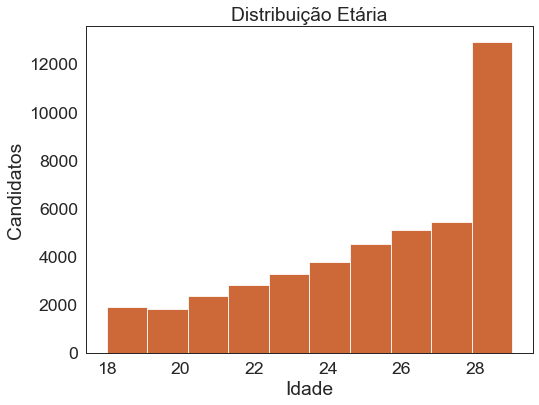

In [42]:
# Criando histograma

idade = apto_urna['NR_IDADE_DATA_POSSE']

plt.figure(figsize=(8, 6))
plt.hist(idade, color= '#CD6839', density=False)
plt.title('Distribuição Etária')
plt.xlabel('Idade')
plt.ylabel('Candidatos')
plt.show()


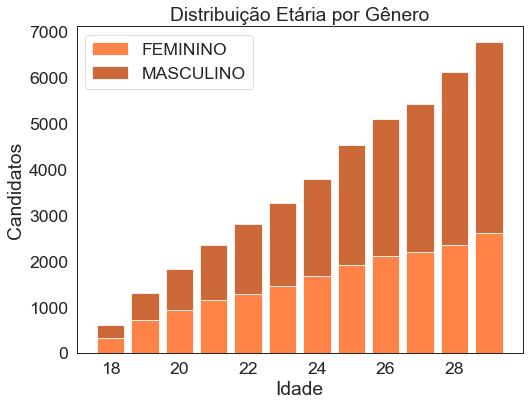

In [200]:
# Reperesentando a faixa etária por genero
fem = np.array((2596, 2336, 2195, 2105, 1911, 1668, 1445, 1272, 1137, 931, 707, 323))
masc = np.array((4180, 3791, 3225, 2993, 2613, 2106, 1808, 1525, 1199, 893, 585, 269))


resources = ['FEMININO', 'MASCULINO']

idades = [29,28,27,26,25,24,23,22,21,20,19,18]

# Aumentando o grafico 
plt.figure(figsize=(8,6))

#Criando barras
plt.bar(idades, fem, color='#FF8247')
plt.bar(idades, masc, color='#CD6839', bottom= fem)

# Adicionando legendas
plt.xlabel('Idade')
plt.ylabel('Candidatos')
plt.title('Distribuição Etária por Gênero')
plt.legend(('FEMININO', 'MASCULINO'))

#mostrando o gráfico
plt.show()

Os candidatos tem em média 25 anos,com as mulheres sendo a maioria entre 18 e 20 anos e já os homens entre 21 e 29 anos

  #### Gênero

In [43]:
apto_urna['DS_GENERO'].value_counts()*100/43813

MASCULINO    57.487504
FEMININO     42.512496
Name: DS_GENERO, dtype: float64

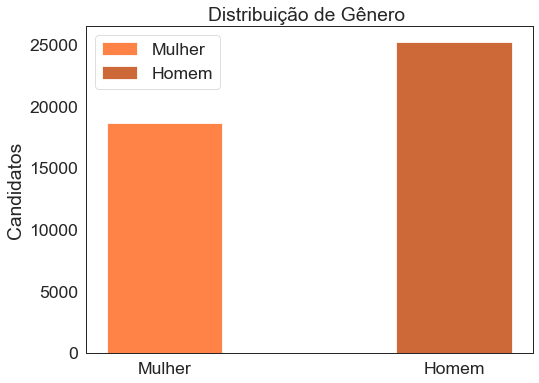

In [44]:
mulher = 18626
homem = 25187


#definindo a largura da barra
barWidth = 0.4

#aumentando o gráfico 
plt.figure(figsize=(8,6))



# Criando as barras 
plt.bar('Mulher', mulher, color='#FF8247', width=barWidth, label= 'Mulher',align='center')
plt.bar('Homem',homem, color='#CD6839', width=barWidth, label= 'Homem', align='center')

# Adicionando legendas

plt.ylabel('Candidatos')
plt.title('Distribuição de Gênero ')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

Há mais homens que mulheres como candidatos aptos na situação de candidatura

 #### Raça

In [16]:
apto_urna['DS_COR_RACA'].value_counts()*100/43813

NEGRA             52.728642
BRANCA            45.192066
SEM INFORMAÇÃO     1.084153
INDÍGENA           0.577454
AMARELA            0.417684
Name: DS_COR_RACA, dtype: float64

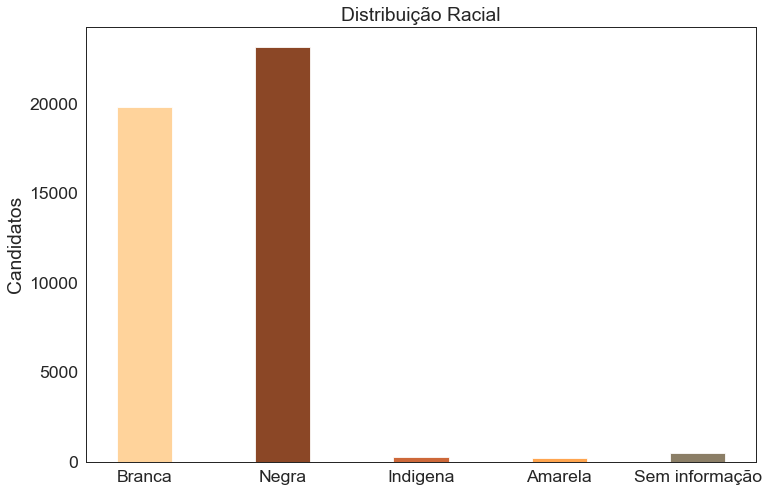

In [215]:
branca = 19800
negra = 23112
indigena = 253
amarela = 183
sem_info = 475


#definindo a largura da barra
barWidth = 0.4

#aumentando o gráfico 
plt.figure(figsize=(12,8))



# Criando as barras 
plt.bar('Branca', branca, color='#FFD39B', width=barWidth, align='center')
plt.bar('Negra',negra, color='#8B4726', width=barWidth, align='center')
plt.bar('Indigena',indigena, color='#CD6839', width=barWidth, align='center')
plt.bar('Amarela',amarela, color='#FFA54F', width=barWidth, align='center')
plt.bar('Sem informação',sem_info, color='#8B7E66', width=barWidth, align='center')

# Adicionando legendas

plt.ylabel('Candidatos')
plt.title('Distribuição Racial')

# Criando legenda e mostrando o gráfico
plt.show()

GÊNERO POR RAÇA

In [21]:
fem = apto_urna[apto_urna['DS_GENERO'] == 'FEMININO']

In [22]:
fem_raca = fem['DS_COR_RACA']

In [23]:
fem_raca.value_counts()

NEGRA             9997
BRANCA            8200
SEM INFORMAÇÃO     208
INDÍGENA           126
AMARELA             95
Name: DS_COR_RACA, dtype: int64

In [98]:
masc = apto_urna[apto_urna['DS_GENERO'] == 'MASCULINO']

In [99]:
masc_raca = masc['DS_COR_RACA']

In [100]:
masc_raca.value_counts()

BRANCA            11600
PARDA             10512
PRETA              2593
SEM INFORMAÇÃO      267
INDÍGENA            127
AMARELA              88
Name: DS_COR_RACA, dtype: int64

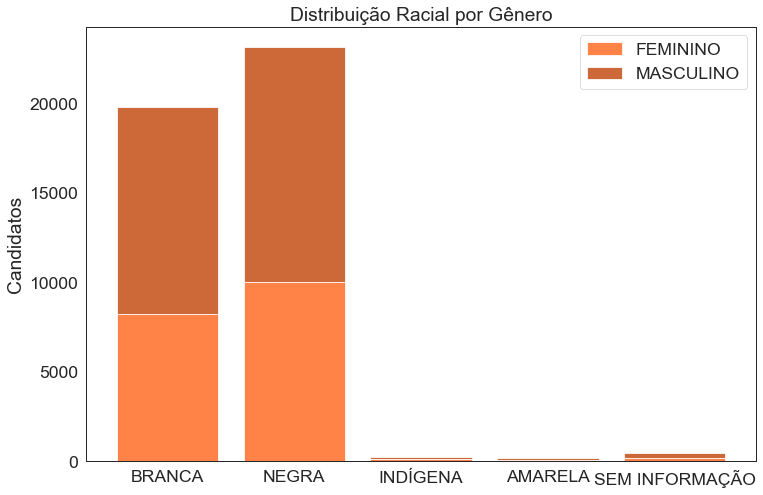

In [103]:
# Gráfico raça por genero
fem = np.array((8200, 9997, 126, 95,208 ))
masc = np.array((11600, 13105, 127, 88, 267 ))


resources = ['FEMININO', 'MASCULINO']

raca = ['BRANCA', 'NEGRA', 'INDÍGENA', 'AMARELA', 'SEM INFORMAÇÃO']

# Auemntando o grafico 
plt.figure(figsize=(12,8))

#Criando barras
plt.bar(raca, fem, color='#FF8247')
plt.bar(raca, masc, color='#CD6839', bottom= fem)

# Adicionando legendas
plt.ylabel('Candidatos')
plt.title('Distribuição Racial por Gênero')
plt.legend(('FEMININO', 'MASCULINO'))

#mostrando o gráfico
plt.show()

Dos 43813 candidatos aptos há 475 sem informação de raça e 52,8% dos candidatos são declarados negros, sendo desses 30% homens.

#### Distribuição territorial dos Candidatos

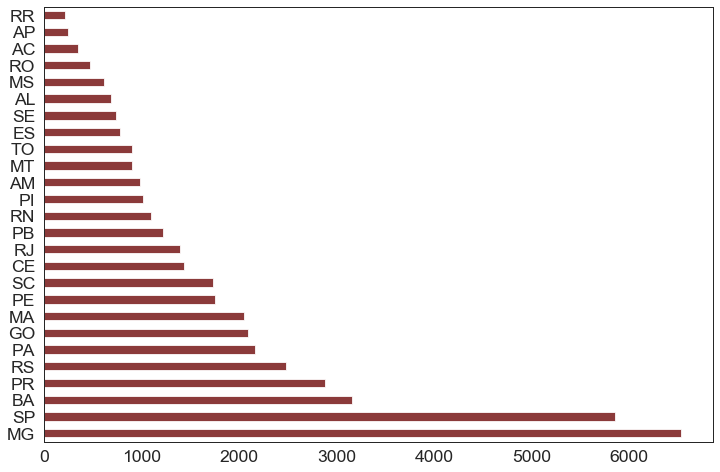

In [225]:
apto_urna['SG_UF'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A')

In [47]:
apto_urna['SG_UF'].value_counts()*100/43813

MG    14.920229
SP    13.359049
BA     7.203341
PR     6.577956
RS     5.658138
PA     4.936891
GO     4.779403
MA     4.683541
PE     4.017073
SC     3.966859
CE     3.277566
RJ     3.186269
PB     2.789127
RN     2.503823
PI     2.325794
AM     2.248191
MT     2.072444
TO     2.061032
ES     1.791706
SE     1.679867
AL     1.572593
MS     1.417388
RO     1.093283
AC     0.807979
AP     0.568324
RR     0.502134
Name: SG_UF, dtype: float64

In [49]:
fem_territorio = apto_urna.filter(items=['DS_GENERO']).where(apto_urna['DS_GENERO'] == 'FEMININO').groupby(apto_urna['SG_UF']).count()

In [50]:
mas_territorio = apto_urna.filter(items=['DS_GENERO']).where(apto_urna['DS_GENERO'] == 'MASCULINO').groupby(apto_urna['SG_UF']).count()

In [57]:
mas_territorio = mas_territorio.rename(columns={'DS_GENERO':'MASCULINO'})

In [52]:
mas_territorio['MASCULINO'].tolist()

[161,
 378,
 460,
 138,
 1676,
 850,
 445,
 1254,
 1129,
 3815,
 341,
 514,
 1180,
 715,
 987,
 565,
 1711,
 835,
 650,
 248,
 105,
 1390,
 1039,
 422,
 3693,
 486]

In [58]:
fem_territorio = fem_territorio.rename(columns={'DS_GENERO':'FEMININO'})

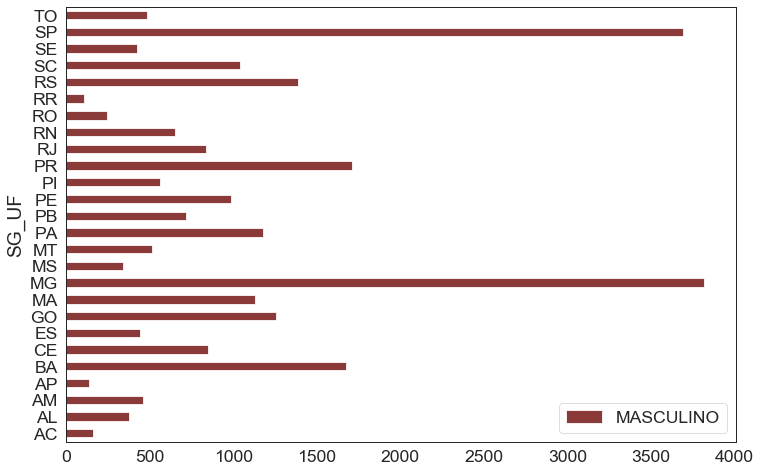

In [60]:
mas_territorio.plot(kind='barh', figsize= (12,8), color='#8B3A3A')

In [55]:
fem_territorio = apto_urna.filter(items=['DS_GENERO']).where(apto_urna['DS_GENERO'] == 'FEMININO').groupby(apto_urna['SG_UF']).count()

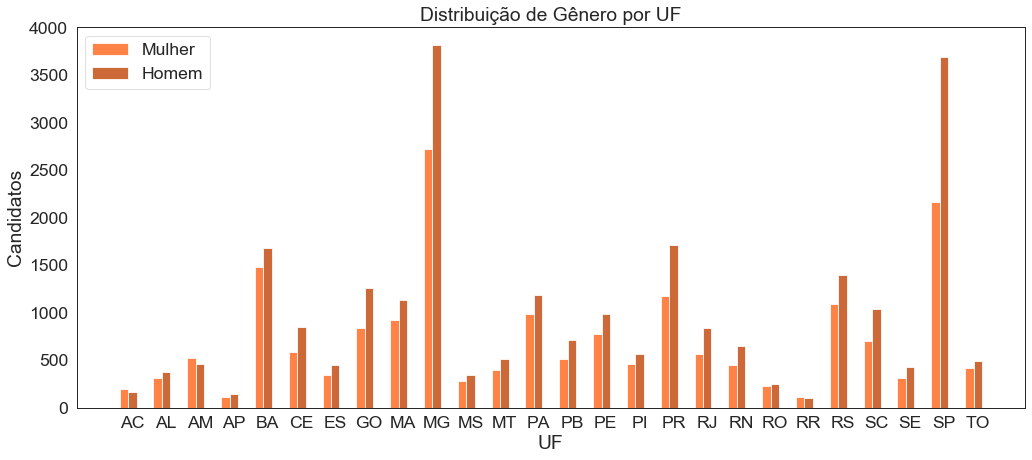

In [73]:
mulher = fem_territorio['FEMININO'].tolist()
homem = mas_territorio['MASCULINO'].tolist()


#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(17,7))

#definindo a posição
r1 = np.arange(len(mulher))
r2 = [x + barWidth for x in r1]

# Criando as barras 
plt.bar(r1, mulher, color='#FF8247', width=barWidth, label= 'Mulher')
plt.bar(r2, homem, color='#CD6839', width=barWidth, label= 'Homem')

# Adicionando legendas
plt.xlabel('UF')
plt.xticks([r + barWidth for r in range(len(mulher))], fem_territorio.index.tolist())
plt.ylabel('Candidatos')
plt.title('Distribuição de Gênero por UF')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

In [90]:
negra1_territorio = apto_urna.filter(items=['DS_COR_RACA']).where(apto_urna['DS_COR_RACA'] == 'PRETA').groupby(apto_urna['SG_UF']).count()

In [80]:
negra2_territorio = apto_urna.filter(items=['DS_COR_RACA']).where(apto_urna['DS_COR_RACA'] == 'PARDA').groupby(apto_urna['SG_UF']).count()

In [82]:
branca_territorio = apto_urna.filter(items=['DS_COR_RACA']).where(apto_urna['DS_COR_RACA'] == 'BRANCA').groupby(apto_urna['SG_UF']).count()

In [92]:
negra_territorio = negra2_territorio + negra1_territorio

In [97]:
branca_territorio

,DS_COR_RACA
SG_UF,
AC,69
AL,189
AM,133
AP,32
BA,587
CE,430
ES,363
GO,821
MA,446


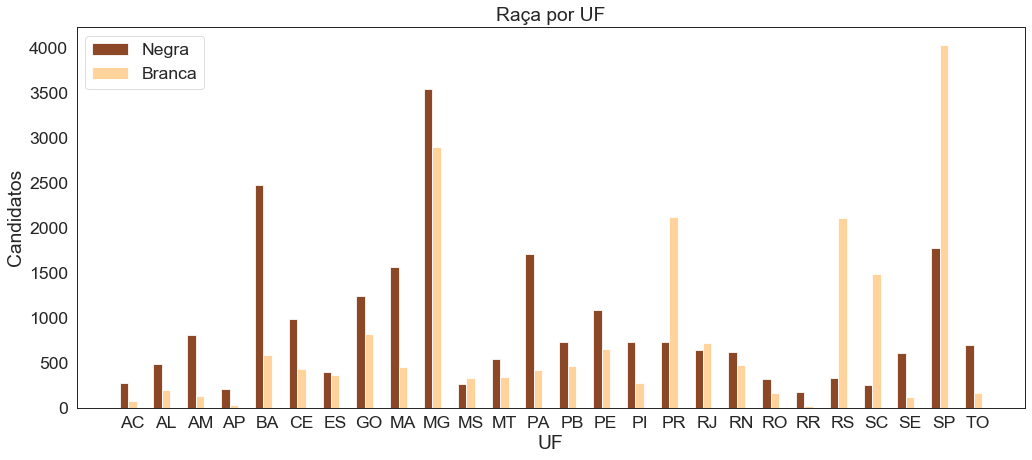

In [95]:
#grafico territorio e raça
negra = negra_territorio['DS_COR_RACA'].tolist()
branca = branca_territorio['DS_COR_RACA'].tolist()


#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(17,7))

#definindo a posição
r1 = np.arange(len(negra))
r2 = [x + barWidth for x in r1]

# Criando as barras 
plt.bar(r1, negra, color='#8B4726', width=barWidth, label= 'Negra')
plt.bar(r2, branca, color='#FFD39B', width=barWidth, label= 'Branca')

# Adicionando legendas
plt.xlabel('UF')
plt.xticks([r + barWidth for r in range(len(negra))], negra_territorio.index.tolist())
plt.ylabel('Candidatos')
plt.title('Raça por UF')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

A maioria dos candidatos se encontram em Minas Gerais, seguido de São Paulo e Bahia

#### Partidos

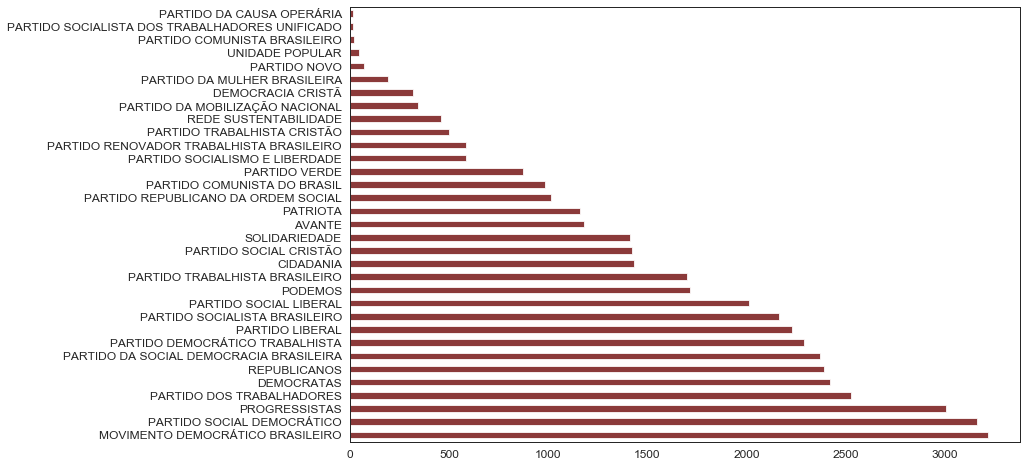

In [133]:
apto_urna['NM_PARTIDO'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

In [134]:
apto_urna['NM_PARTIDO'].value_counts()

MOVIMENTO DEMOCRÁTICO BRASILEIRO                  3219
PARTIDO SOCIAL DEMOCRÁTICO                        3163
PROGRESSISTAS                                     3006
PARTIDO DOS TRABALHADORES                         2527
DEMOCRATAS                                        2421
REPUBLICANOS                                      2392
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           2373
PARTIDO DEMOCRÁTICO TRABALHISTA                   2289
PARTIDO LIBERAL                                   2228
PARTIDO SOCIALISTA BRASILEIRO                     2165
PARTIDO SOCIAL LIBERAL                            2011
PODEMOS                                           1713
PARTIDO TRABALHISTA BRASILEIRO                    1698
CIDADANIA                                         1433
PARTIDO SOCIAL CRISTÃO                            1422
SOLIDARIEDADE                                     1410
AVANTE                                            1182
PATRIOTA                                          1158
PARTIDO RE

O partido com o maior número de candidatos é MOVIMENTO DEMOCRÁTICO BRASILEIRO e o com menor número de candidatos é o PARTIDO DA CAUSA OPERÁRIA.

 #### Valor de despesas por candidatos

In [3]:
despesas = pd.DataFrame(apto_urna['VR_DESPESA_MAX_CAMPANHA'].value_counts())

In [4]:
despesas = despesas.rename(columns={'VR_DESPESA_MAX_CAMPANHA': 'DISTRIBUICAO'})

In [5]:
despesas['VR_DESPESA_MAX_CAMPANHA'] = despesas.index

In [6]:
despesas['VR_DESPESA_MAX_CAMPANHA'].describe()

count    2.128000e+03
mean     1.420211e+05
std      8.420254e+05
min      1.230775e+04
25%      2.036639e+04
50%      2.986614e+04
75%      5.577217e+04
max      3.041348e+07
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

In [7]:
# Despesas menos que 50.000 reais
despesas_1 = despesas.loc[despesas['VR_DESPESA_MAX_CAMPANHA'] <= 50000]

In [8]:
despesas_2 = despesas.loc[(despesas['VR_DESPESA_MAX_CAMPANHA'] >  50000) & (despesas['VR_DESPESA_MAX_CAMPANHA'] <  100000)]

In [9]:
#despesas entre 100.000 e 500.000 reais
despesas_3 = despesas.loc[(despesas['VR_DESPESA_MAX_CAMPANHA'] >=  100000) & (despesas['VR_DESPESA_MAX_CAMPANHA'] <  500000)]

In [10]:
#despesas maior ou igual a 500.000 reais
despesas_4 = despesas.loc[despesas['VR_DESPESA_MAX_CAMPANHA'] >= 500000]

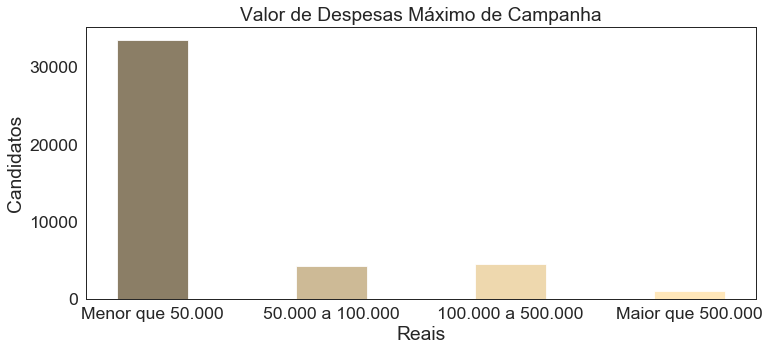

In [51]:
despesa_1 = 33514
despesa_2 = 4177
despesa_3 = 4403
despesa_4 = 942

#definindo a largura da barra
barWidth = 0.4

#aumentando o gráfico 
plt.figure(figsize=(12,5))



# Criando as barras 
plt.bar('Menor que 50.000', despesa_1, color='#8B7E66', width=barWidth, align='center')
plt.bar('50.000 a 100.000',despesa_2, color='#CDBA96', width=barWidth, align='center')
plt.bar('100.000 a 500.000',despesa_3, color='#EED8AE', width=barWidth, align='center')
plt.bar('Maior que 500.000',despesa_4, color='#FFE7BA', width=barWidth, align='center')

# Adicionando legendas
plt.xlabel('Reais')
plt.ylabel('Candidatos')
plt.title('Valor de Despesas Máximo de Campanha')

plt.savefig('despesas1.png')

# Criando legenda e mostrando o gráfico
plt.show()

In [16]:
negra1_renda = apto_urna.filter(items=['DS_COR_RACA']).where(apto_urna['DS_COR_RACA'] == 'PRETA').groupby(apto_urna['VR_DESPESA_MAX_CAMPANHA']).count()

In [17]:
negra2_renda = apto_urna.filter(items=['DS_COR_RACA']).where(apto_urna['DS_COR_RACA'] == 'PARDA').groupby(apto_urna['VR_DESPESA_MAX_CAMPANHA']).count()

In [18]:
branca_renda = apto_urna.filter(items=['DS_COR_RACA']).where(apto_urna['DS_COR_RACA'] == 'BRANCA').groupby(apto_urna['VR_DESPESA_MAX_CAMPANHA']).count()

In [19]:
negra_renda = negra1_renda + negra2_renda

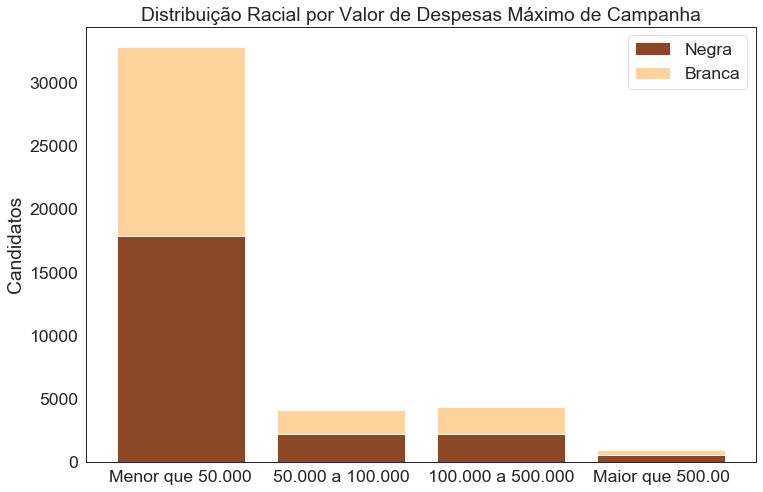

In [47]:
# Reperesentanto a distribuição racial, foi excluido os ignorados e amarelos pois estavam zerados
negro = np.array(( 17863, 2166, 2196,529))
branco = np.array((14923,1922,2133, 403))

resources = ['Negra', 'Branca']

renda = [ 'Menor que 50.000', '50.000 a 100.000','100.000 a 500.000', 'Maior que 500.00']

# Auemntando o grafico 
plt.figure(figsize=(12,8))

#Criando barras
plt.bar(renda, negro, color='#8B4726')
plt.bar(renda, branco, color='#FFD39B', bottom= negro)

# Adicionando legendas
plt.ylabel('Candidatos')
plt.title('Distribuição Racial por Valor de Despesas Máximo de Campanha')
plt.legend(('Negra', 'Branca'))

plt.savefig('despesas_raca.png')

#mostrando o gráfico
plt.show()

In [130]:
fem_renda = apto_urna.filter(items=['DS_GENERO']).where(apto_urna['DS_GENERO'] == 'FEMININO').groupby(apto_urna['VR_DESPESA_MAX_CAMPANHA']).count()

In [129]:
mas_renda = apto_urna.filter(items=['DS_GENERO']).where(apto_urna['DS_GENERO'] == 'MASCULINO').groupby(apto_urna['VR_DESPESA_MAX_CAMPANHA']).count()

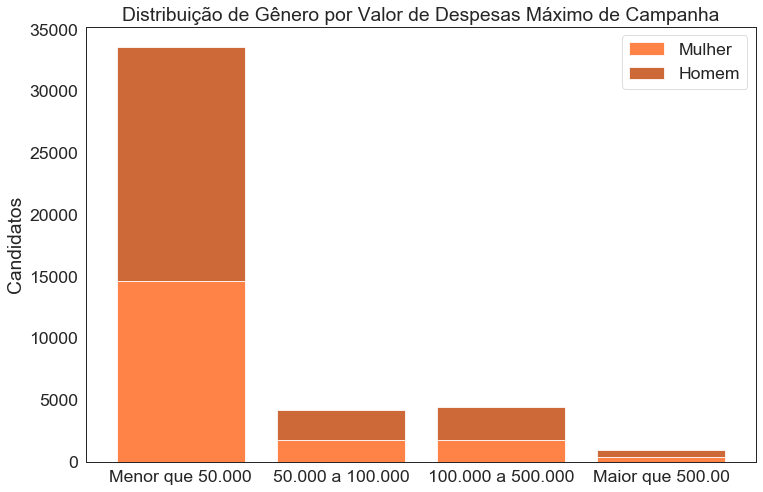

In [49]:
mulher = np.array((14587, 1738, 1710,377))
homem = np.array((18927,2439,2693, 565))

resources = ['Mulher', 'Homem']

renda = [ 'Menor que 50.000', '50.000 a 100.000','100.000 a 500.000', 'Maior que 500.00']

# Auemntando o grafico 
plt.figure(figsize=(12,8))

#Criando barras
plt.bar(renda, mulher, color='#FF8247')
plt.bar(renda, homem, color='#CD6839', bottom= mulher)

# Adicionando legendas
plt.ylabel('Candidatos')
plt.title('Distribuição de Gênero por Valor de Despesas Máximo de Campanha')
plt.legend(('Mulher', 'Homem'))

plt.savefig('despesas_genero.png')

#mostrando o gráfico
plt.show()

  Valor de despesas por UF

In [26]:
renda1 = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where(apto_urna['VR_DESPESA_MAX_CAMPANHA'] <= 50000).groupby(apto_urna['SG_UF']).count()

In [27]:
renda2 = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where((apto_urna['VR_DESPESA_MAX_CAMPANHA'] >  50000) & (apto_urna['VR_DESPESA_MAX_CAMPANHA'] <  100000)).groupby(apto_urna['SG_UF']).count()

In [28]:
renda3 = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where((apto_urna['VR_DESPESA_MAX_CAMPANHA'] >=  100000) & (apto_urna['VR_DESPESA_MAX_CAMPANHA'] <  500000)).groupby(apto_urna['SG_UF']).count()

In [29]:
renda4 = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where((apto_urna['VR_DESPESA_MAX_CAMPANHA'] >= 500000)).groupby(apto_urna['SG_UF']).count()

In [30]:
renda_uf = pd.DataFrame(renda1)

In [31]:
renda_uf['50.000 a 100.000'] = renda2['VR_DESPESA_MAX_CAMPANHA']
renda_uf['100.000 a 500.000'] = renda3['VR_DESPESA_MAX_CAMPANHA']
renda_uf['Maior que 500.000'] = renda4['VR_DESPESA_MAX_CAMPANHA']

In [32]:
renda_uf = renda_uf.rename(columns={'VR_DESPESA_MAX_CAMPANHA':'Menor que 50.000'})

In [96]:
renda_uf

,Menor que 50.000,50.000 a 100.000,100.000 a 500.000,Maior que 500.000
SG_UF,,,,
AC,291,10,50,0
AL,526,83,57,2
AM,735,137,31,77
AP,175,30,42,0
BA,2674,265,168,2
CE,1124,157,28,85
ES,488,140,142,2
GO,1510,252,212,83
MA,1658,70,201,79


 Gráfico valor de despesas por UF

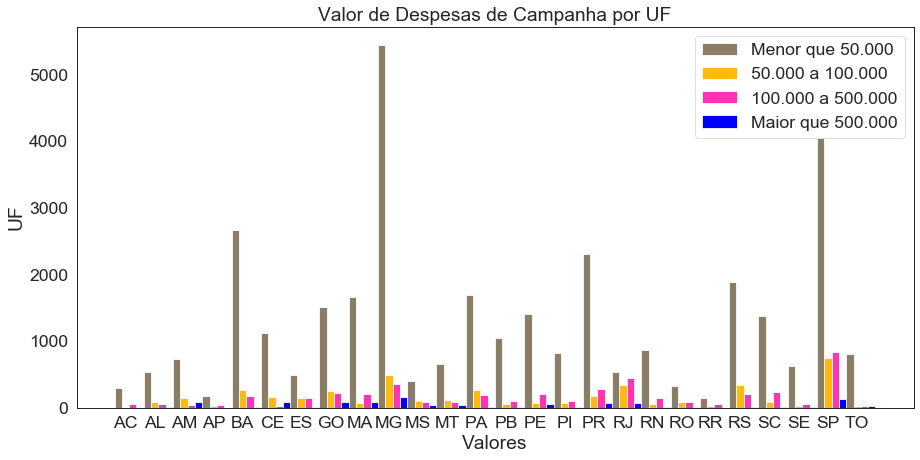

In [34]:
# renda 1 = Até 50.000
# renda 2 = de 50.000 a 100.000
# renda 3 = de 100.000 a 500.000
# renda 4 = Maior que 500.000

renda_1 = renda1['VR_DESPESA_MAX_CAMPANHA'].tolist()
renda_2 = renda2['VR_DESPESA_MAX_CAMPANHA'].tolist()
renda_3 = renda3['VR_DESPESA_MAX_CAMPANHA'].tolist()
renda_4 = renda4['VR_DESPESA_MAX_CAMPANHA'].tolist()

#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(15,7))

#definindo a posição
r1 = np.arange(len(renda_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Criando as barras 
plt.bar(r1, renda_1, color='#8B7E66', width=barWidth, label= 'Menor que 50.000')
plt.bar(r2, renda_2, color='#FFB90F', width=barWidth, label= '50.000 a 100.000')
plt.bar(r3, renda_3, color='#FF34B3', width=barWidth, label= '100.000 a 500.000')
plt.bar(r4, renda_4, color='#0000FF', width=barWidth, label= 'Maior que 500.000')

# Adicionando legendas
plt.xlabel('Valores')
plt.xticks([r + barWidth for r in range(len(renda_1))], renda1.index.tolist())
plt.ylabel('UF')
plt.title('Valor de Despesas de Campanha por UF')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

Valor de despesas por partido

In [35]:
renda1_partido = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where(apto_urna['VR_DESPESA_MAX_CAMPANHA'] <= 50000).groupby(apto_urna['NM_PARTIDO']).count()

In [36]:
renda2_partido = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where((apto_urna['VR_DESPESA_MAX_CAMPANHA'] >  50000) & (apto_urna['VR_DESPESA_MAX_CAMPANHA'] <  100000)).groupby(apto_urna['NM_PARTIDO']).count()

In [37]:
renda3_partido = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where((apto_urna['VR_DESPESA_MAX_CAMPANHA'] >=  100000) & (apto_urna['VR_DESPESA_MAX_CAMPANHA'] <  500000)).groupby(apto_urna['NM_PARTIDO']).count()

In [38]:
renda4_partido = apto_urna.filter(items=['VR_DESPESA_MAX_CAMPANHA']).where((apto_urna['VR_DESPESA_MAX_CAMPANHA'] >= 500000)).groupby(apto_urna['NM_PARTIDO']).count()

In [40]:
renda_partido = pd.DataFrame(renda1_partido)

In [41]:
renda_partido['50.000 a 100.000'] = renda2_partido['VR_DESPESA_MAX_CAMPANHA']

In [42]:
renda_partido['100.000 a 500.000'] = renda3_partido['VR_DESPESA_MAX_CAMPANHA']
renda_partido['Maior que 500.000'] = renda4_partido['VR_DESPESA_MAX_CAMPANHA']


In [43]:
renda_partido = renda_partido.rename(columns={'VR_DESPESA_MAX_CAMPANHA':'Menor que 50.000'})

In [79]:
renda_partido

,Menor que 50.000,50.000 a 100.000,100.000 a 500.000,Maior que 500.000
NM_PARTIDO,,,,
AVANTE,904,116,119,21
CIDADANIA,1075,145,159,32
DEMOCRACIA CRISTÃ,160,73,63,16
DEMOCRATAS,1985,214,158,33
MOVIMENTO DEMOCRÁTICO BRASILEIRO,2743,192,203,28
PARTIDO COMUNISTA BRASILEIRO,0,2,12,6
PARTIDO COMUNISTA DO BRASIL,611,119,191,43
PARTIDO DA CAUSA OPERÁRIA,3,1,1,7
PARTIDO DA MOBILIZAÇÃO NACIONAL,206,51,59,19


Gráfico Valor de Despesas por Partido

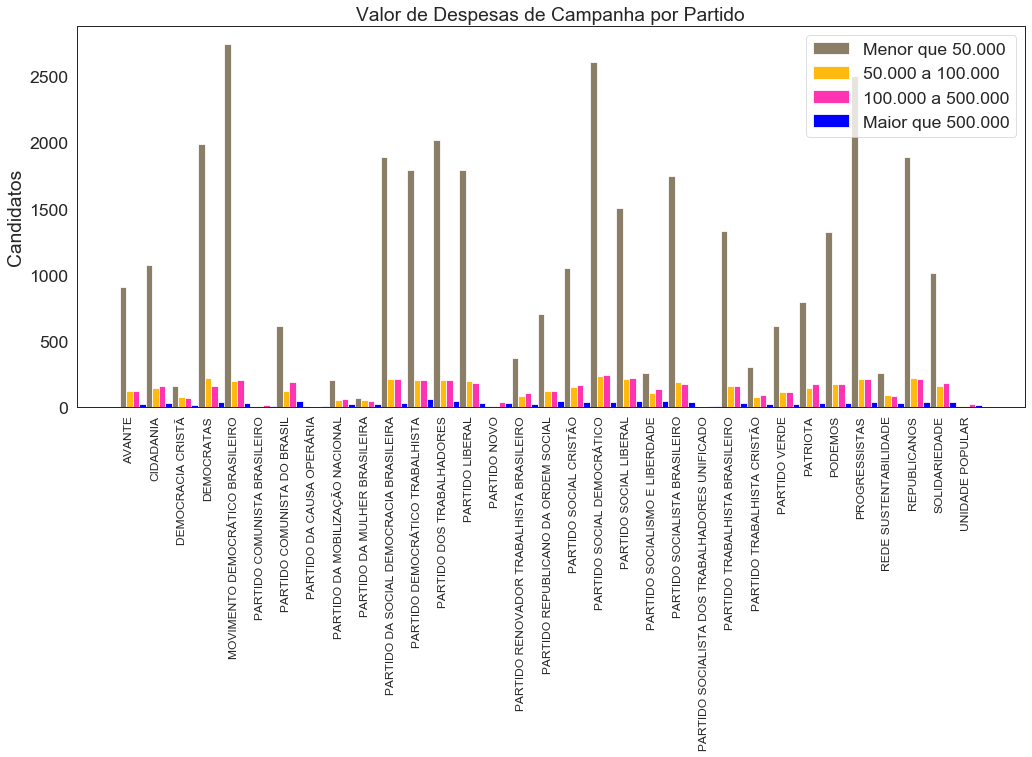

In [44]:
# renda 1 = Até 50.000
# renda 2 = de 50.000 a 100.000
# renda 3 = de 100.000 a 500.000
# renda 4 = Maior que 500.000

renda_1 = renda1_partido['VR_DESPESA_MAX_CAMPANHA'].tolist()
renda_2 = renda2_partido['VR_DESPESA_MAX_CAMPANHA'].tolist()
renda_3 = renda3_partido['VR_DESPESA_MAX_CAMPANHA'].tolist()
renda_4 = renda4_partido['VR_DESPESA_MAX_CAMPANHA'].tolist()

#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(17,7))

#definindo a posição
r1 = np.arange(len(renda_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Criando as barras 
plt.bar(r1, renda_1, color='#8B7E66', width=barWidth, label= 'Menor que 50.000')
plt.bar(r2, renda_2, color='#FFB90F', width=barWidth, label= '50.000 a 100.000')
plt.bar(r3, renda_3, color='#FF34B3', width=barWidth, label= '100.000 a 500.000')
plt.bar(r4, renda_4, color='#0000FF', width=barWidth, label= 'Maior que 500.000')

# Adicionando legendas
plt.xticks([r + barWidth for r in range(len(renda_1))], renda1_partido.index.tolist(),rotation=90, fontsize=12)
plt.ylabel('Candidatos')
plt.title('Valor de Despesas de Campanha por Partido')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

 - Valor de despesas de Campanha não informado

In [24]:
sem_despesa = apto_urna.loc[apto_urna['VR_DESPESA_MAX_CAMPANHA'].isnull()]

In [118]:
sem_despesa['NR_IDADE_DATA_POSSE'].value_counts()

28    152
29    139
26    123
27    101
25     80
24     57
23     53
22     40
21     32
Name: NR_IDADE_DATA_POSSE, dtype: int64

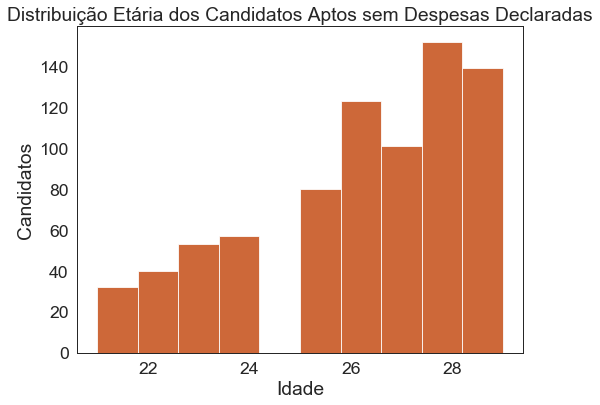

In [121]:
# Criando histograma

idade = sem_despesa['NR_IDADE_DATA_POSSE']

plt.figure(figsize=(8, 6))
plt.hist(idade, color= '#CD6839', density=False)
plt.title('Distribuição Etária dos Candidatos Aptos sem Despesas Declaradas')
plt.xlabel('Idade')
plt.ylabel('Candidatos')
plt.show()


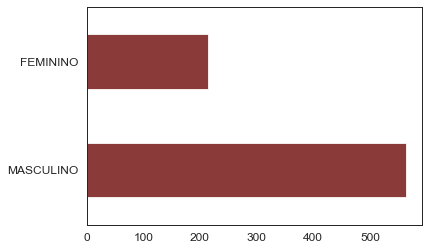

In [142]:
sem_despesa['DS_GENERO'].value_counts().plot(kind='barh', color='#8B3A3A', fontsize=12)

In [25]:
sem_despesa['DS_COR_RACA'].value_counts()*100/777

BRANCA            53.925354
NEGRA             44.787645
SEM INFORMAÇÃO     0.643501
AMARELA            0.386100
INDÍGENA           0.257400
Name: DS_COR_RACA, dtype: float64

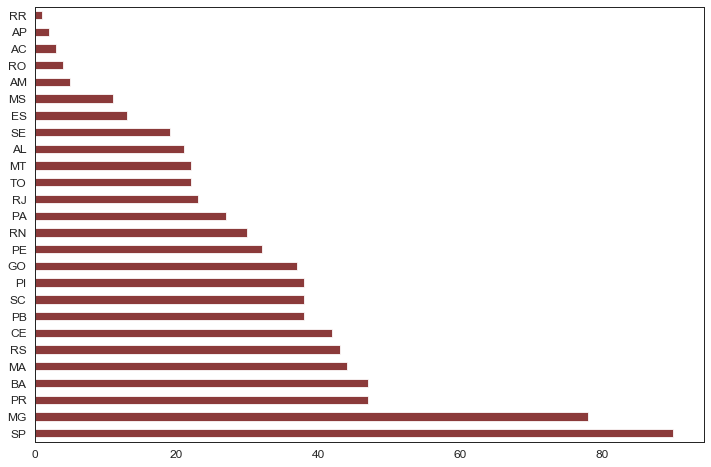

In [138]:
sem_despesa['SG_UF'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

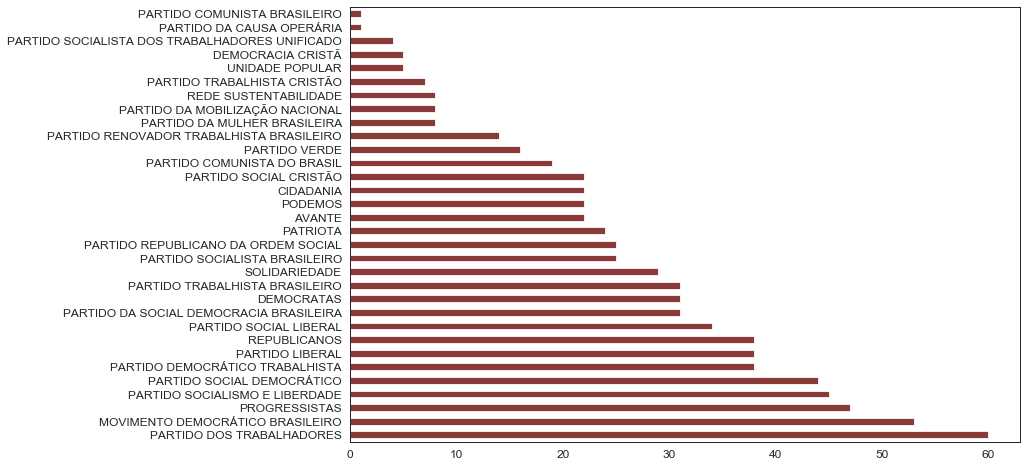

In [139]:
sem_despesa['NM_PARTIDO'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

In [123]:
sem_despesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 45 to 43791
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    777 non-null    int64  
 1   ANO_ELEICAO                   777 non-null    int64  
 2   SG_UF                         777 non-null    object 
 3   DS_CARGO                      777 non-null    object 
 4   NM_CANDIDATO                  777 non-null    object 
 5   DS_SITUACAO_CANDIDATURA       777 non-null    object 
 6   DS_DETALHE_SITUACAO_CAND      777 non-null    object 
 7   NM_PARTIDO                    777 non-null    object 
 8   NR_IDADE_DATA_POSSE           777 non-null    int64  
 9   DS_GENERO                     777 non-null    object 
 10  DS_GRAU_INSTRUCAO             777 non-null    object 
 11  DS_COR_RACA                   777 non-null    object 
 12  VR_DESPESA_MAX_CAMPANHA       0 non-null      float64
 13  DS

Dos 43813 candidatos considerados aptos há 777 que não declarou o valor de despesas máxima de campanha. Dentre esses 72% são homens e 54% declarados brancos. Esses candidatos se concentram em maoria em São Paulo seguido de Minas Gerais e o partido que mais tem candidatos que não declararam as despesas é o PARTIDO DOS TRABALHADORES.

<h5>Aptos mas inaptos em pleito e urna</h5>

1. Pleito

In [14]:
aptos['DS_SITUACAO_CANDIDATO_PLEITO'].value_counts()

DEFERIDO                            44300
INDEFERIDO COM RECURSO                152
DEFERIDO COM RECURSO                  136
PENDENTE DE JULGAMENTO                 80
INDEFERIDO                              6
PEDIDO NÃO CONHECIDO COM RECURSO        2
#NULO#                                  2
RENÚNCIA                                1
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

In [157]:
pendente_pleito = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_PLEITO'] == 'PENDENTE DE JULGAMENTO']

In [158]:
indeferido_pleito  = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_PLEITO'] == 'INDEFERIDO COM RECURSO']

In [159]:
pedido_nao_pleito = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_PLEITO'] == 'PEDIDO NÃO CONHECIDO COM RECURSO']

In [160]:
nulo_pleito = pedido_nao = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_PLEITO'] == '#NULO#']

In [161]:
indef_pleito  = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_PLEITO'] == 'INDEFERIDO']

In [162]:
inaptos_pleito = pd.concat([pendente_pleito, indeferido_pleito, pedido_nao_pleito, nulo_pleito,indef_pleito ])

In [163]:
inaptos_pleito['VR_DESPESA_MAX_CAMPANHA'].min()

12307.75

In [164]:
inaptos_pleito.to_csv('inaptos_pleito')

In [49]:
inaptos_pleito.loc[inaptos_pleito['VR_DESPESA_MAX_CAMPANHA'].isnull()]

,ANO_ELEICAO,SG_UF,DS_CARGO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NM_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
10813,2020,GO,VICE-PREFEITO,JOÃO PEDRO ALMEIDA RIBEIRO,APTO,DEFERIDO COM RECURSO,DEMOCRATAS,26,MASCULINO,SUPERIOR COMPLETO,BRANCA,NaN,PENDENTE DE JULGAMENTO,PENDENTE DE JULGAMENTO
25431,2020,SP,VICE-PREFEITO,VIVIAN COUTINHO CAVALCANTE,APTO,DEFERIDO,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,28,FEMININO,SUPERIOR COMPLETO,BRANCA,NaN,PENDENTE DE JULGAMENTO,PENDENTE DE JULGAMENTO
31435,2020,SP,VICE-PREFEITO,JONATHAN FRANCISCO GOMES JUNIOR,APTO,DEFERIDO,PARTIDO SOCIAL LIBERAL,21,MASCULINO,SUPERIOR INCOMPLETO,PRETA,NaN,PENDENTE DE JULGAMENTO,PENDENTE DE JULGAMENTO
44030,2020,SC,VICE-PREFEITO,LUIS PAULO SEVERO DE OLIVEIRA,APTO,PENDENTE DE JULGAMENTO,AVANTE,29,MASCULINO,SUPERIOR COMPLETO,BRANCA,NaN,PENDENTE DE JULGAMENTO,PENDENTE DE JULGAMENTO
12958,2020,MA,VICE-PREFEITO,JOAO LUCAS OLIVEIRA CARVALHO SILVA,APTO,INDEFERIDO COM RECURSO,PARTIDO DEMOCRÁTICO TRABALHISTA,21,MASCULINO,SUPERIOR INCOMPLETO,PARDA,NaN,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO
18342,2020,PR,VICE-PREFEITO,ABNER ALI KHALAF,APTO,DEFERIDO,PARTIDO TRABALHISTA BRASILEIRO,29,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,NaN,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO
32610,2020,MS,VICE-PREFEITO,MATEUS FELIPE FROES GIMENEZ,APTO,INDEFERIDO COM RECURSO,PATRIOTA,22,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,NaN,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO
47002,2020,PI,VICE-PREFEITO,DOUGLAS JOSÉ ALVES,APTO,DEFERIDO COM RECURSO,PARTIDO SOCIAL DEMOCRÁTICO,28,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,PARDA,NaN,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO
43585,2020,SP,PREFEITO,MARCELO RODRIGUES FONSECA,APTO,DEFERIDO,DEMOCRATAS,29,MASCULINO,SUPERIOR COMPLETO,BRANCA,NaN,#NULO#,#NULO#
45787,2020,SP,PREFEITO,RAFAELA SOUZA DE GOIS,APTO,DEFERIDO,MOVIMENTO DEMOCRÁTICO BRASILEIRO,23,FEMININO,SUPERIOR COMPLETO,BRANCA,NaN,#NULO#,#NULO#


In [22]:
inaptos_pleito['VR_DESPESA_MAX_CAMPANHA'].max()

1594577.38

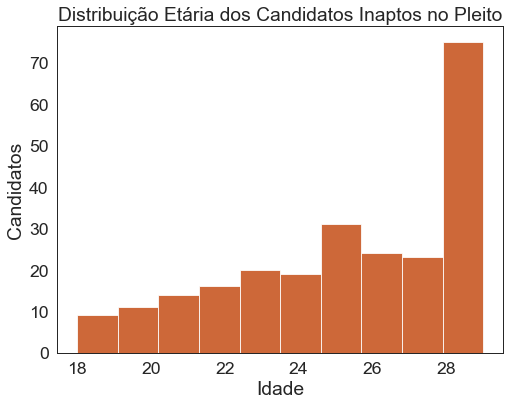

In [169]:
# Criando histograma

idade = inaptos_pleito['NR_IDADE_DATA_POSSE']

plt.figure(figsize=(8, 6))
plt.hist(idade, color= '#CD6839', density=False)
plt.title('Distribuição Etária dos Candidatos Inaptos no Pleito')
plt.xlabel('Idade')
plt.ylabel('Candidatos')
plt.show()


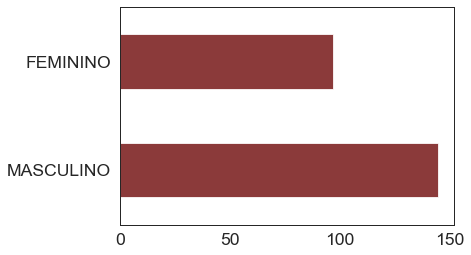

In [165]:
inaptos_pleito['DS_GENERO'].value_counts().plot(kind='barh', color='#8B3A3A')

In [166]:
inaptos_pleito['DS_COR_RACA'].value_counts()

BRANCA            111
PARDA              98
PRETA              29
SEM INFORMAÇÃO      2
INDÍGENA            1
AMARELA             1
Name: DS_COR_RACA, dtype: int64

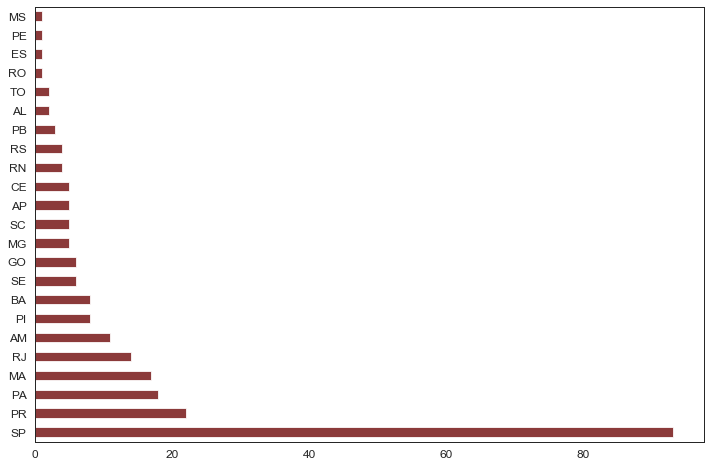

In [167]:
inaptos_pleito['SG_UF'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

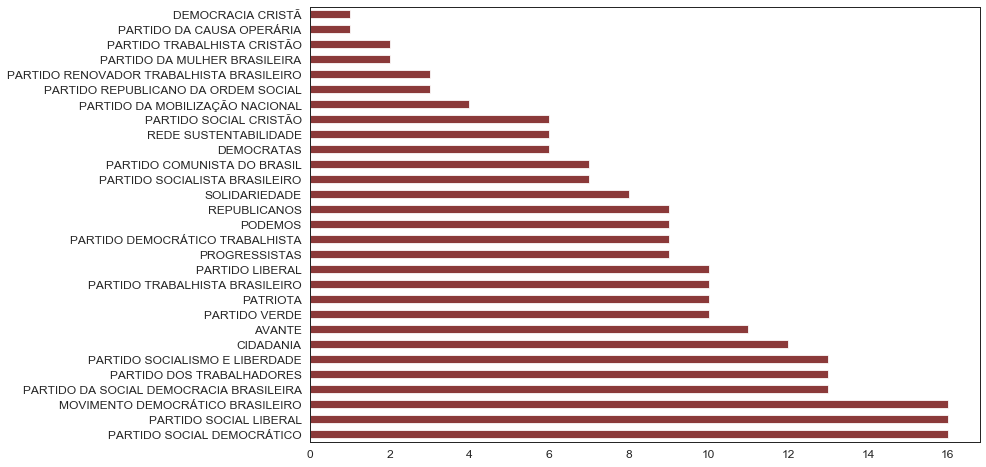

In [168]:
inaptos_pleito['NM_PARTIDO'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

2. Urna

In [52]:
inaptos_pleito['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                            126
INDEFERIDO COM RECURSO               98
PENDENTE DE JULGAMENTO               11
DEFERIDO COM RECURSO                  5
PEDIDO NÃO CONHECIDO COM RECURSO      2
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [18]:
pendente = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_URNA'] == 'PENDENTE DE JULGAMENTO']

In [19]:
indeferido  = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_URNA'] == 'INDEFERIDO COM RECURSO']

In [21]:
pedido_nao = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_URNA'] == 'PEDIDO NÃO CONHECIDO COM RECURSO']

In [20]:
nulo = pedido_nao = aptos.loc[aptos['DS_SITUACAO_CANDIDATO_URNA'] == '#NULO#']

In [23]:
inaptos_urna = pd.concat([pendente, indeferido, pedido_nao, nulo])

In [26]:
inaptos_urna['VR_DESPESA_MAX_CAMPANHA'].describe()

count    8.210000e+02
mean     1.142738e+05
std      2.054346e+05
min      1.230775e+04
25%      1.230775e+04
50%      3.159660e+04
75%      1.065318e+05
max      1.602918e+06
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

In [30]:
inaptos_urna.loc[inaptos_urna['VR_DESPESA_MAX_CAMPANHA'].isnull()]

,ANO_ELEICAO,SG_UF,DS_CARGO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,NM_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
2281,2020,SP,VICE-PREFEITO,WELLINGTON LUIS PEGORIN,APTO,DEFERIDO,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,27,MASCULINO,SUPERIOR COMPLETO,BRANCA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
2393,2020,GO,VICE-PREFEITO,OSÉIAS GONÇALVES MARGARIDA,APTO,DEFERIDO,PROGRESSISTAS,29,MASCULINO,SUPERIOR COMPLETO,PRETA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
2888,2020,PA,VICE-PREFEITO,SABRINA SANTOS MOURA,APTO,DEFERIDO,PARTIDO SOCIALISTA BRASILEIRO,23,FEMININO,SUPERIOR COMPLETO,BRANCA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
2982,2020,MG,VICE-PREFEITO,MARCOS VINICIUS DE FREITAS GOMES,APTO,DEFERIDO,PATRIOTA,27,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,PRETA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
5071,2020,SC,VICE-PREFEITO,GUSTAVO CARVALHO DA SILVA,APTO,DEFERIDO,REPUBLICANOS,24,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
10813,2020,GO,VICE-PREFEITO,JOÃO PEDRO ALMEIDA RIBEIRO,APTO,DEFERIDO COM RECURSO,DEMOCRATAS,26,MASCULINO,SUPERIOR COMPLETO,BRANCA,NaN,PENDENTE DE JULGAMENTO,PENDENTE DE JULGAMENTO
10848,2020,PE,VICE-PREFEITO,NIKAEL PEDRO DE SOUZA ARAÚJO,APTO,DEFERIDO,DEMOCRATAS,29,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
11798,2020,AL,VICE-PREFEITO,WHELDER FRANCISCO DA SILVA,APTO,DEFERIDO,PARTIDO DOS TRABALHADORES,25,MASCULINO,SUPERIOR INCOMPLETO,BRANCA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
13949,2020,RN,VICE-PREFEITO,GESSIEL PONTES CARDOSO,APTO,DEFERIDO,PARTIDO LIBERAL,24,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,PARDA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO
16482,2020,PA,VICE-PREFEITO,EDLA RAIANE COSTA PONTES,APTO,DEFERIDO,PARTIDO SOCIAL CRISTÃO,27,FEMININO,LÊ E ESCREVE,PARDA,NaN,DEFERIDO,PENDENTE DE JULGAMENTO


In [32]:
inaptos_urna['DS_SITUACAO_CANDIDATO_PLEITO'].value_counts()

DEFERIDO                            598
INDEFERIDO COM RECURSO              152
PENDENTE DE JULGAMENTO               80
DEFERIDO COM RECURSO                 26
INDEFERIDO                            6
#NULO#                                2
PEDIDO NÃO CONHECIDO COM RECURSO      2
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

In [53]:
inaptos_urna['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                            742
INDEFERIDO COM RECURSO               98
DEFERIDO COM RECURSO                 13
PENDENTE DE JULGAMENTO               11
PEDIDO NÃO CONHECIDO COM RECURSO      2
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

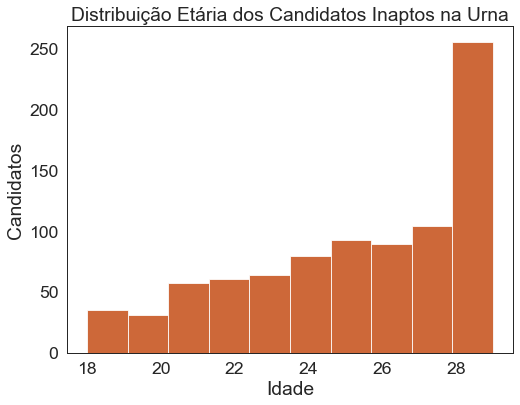

In [170]:
# Criando histograma

idade = inaptos_urna['NR_IDADE_DATA_POSSE']

plt.figure(figsize=(8, 6))
plt.hist(idade, color= '#CD6839', density=False)
plt.title('Distribuição Etária dos Candidatos Inaptos na Urna')
plt.xlabel('Idade')
plt.ylabel('Candidatos')
plt.show()


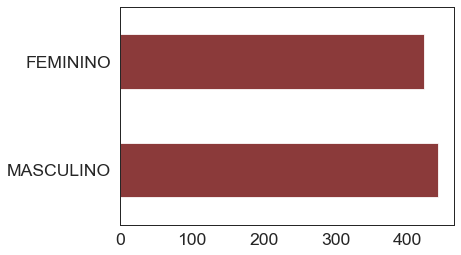

In [147]:
inaptos_urna['DS_GENERO'].value_counts().plot(kind='barh', color='#8B3A3A')

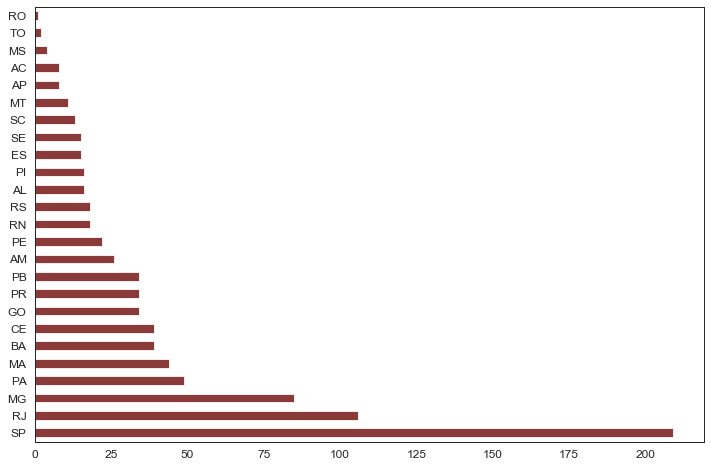

In [148]:
inaptos_urna['SG_UF'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

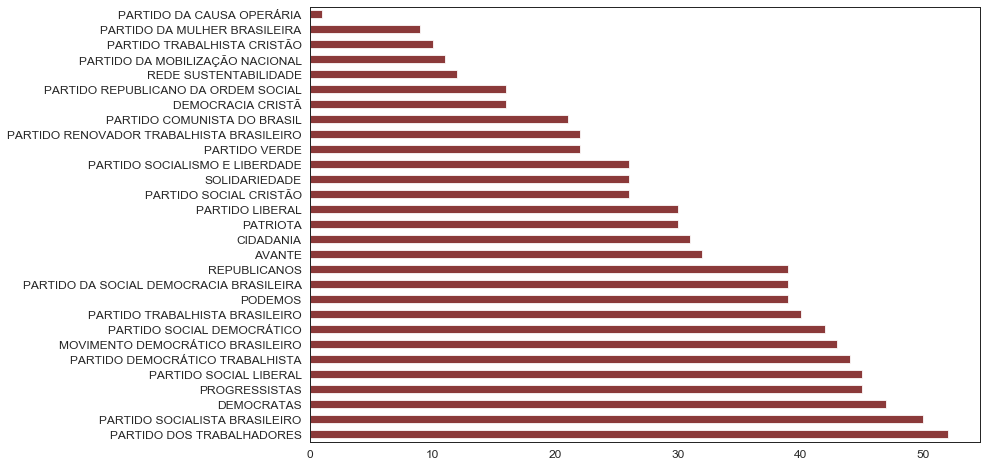

In [150]:
inaptos_urna['NM_PARTIDO'].value_counts().plot(kind='barh', figsize=(12,8), color='#8B3A3A', fontsize=12)

In [152]:
inaptos_urna['DS_COR_RACA'].value_counts()

PARDA             371
BRANCA            371
PRETA             101
SEM INFORMAÇÃO     16
INDÍGENA            4
AMARELA             3
Name: DS_COR_RACA, dtype: int64

In [33]:
inaptos_urna.to_csv('inaptos_urna.csv')

Dos 44679 candidatos apto a candidatura, 242 estavam com a situação em pleito inapta e 866 com situação inapta na urna. Dos 866 inaptos na urna 45 não tinha declarado o valor de despesas e 598 tem situação apta em pleito. Já os com situação de pleito inapta, tiveram 10 candidatos sem declaração de valor de despesas.